# FBI Crime Data Analysis

In [62]:
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

The following cell is used to build up the dataframes we need. Note I group dfs with obvious relationship between them, there could still be some potential relevance between different groups.

In [91]:

# Note that one incident could have up to 10 offense record
incidentDF = pd.read_csv("PA-2016/nibrs_incident.csv")
offenseDF = pd.read_csv("PA-2016/nibrs_offense.csv")
offenseTypeDF = pd.read_csv("PA-2016/nibrs_offense_type.csv")

# For relationship analysis
victimDF = pd.read_csv("PA-2016/nibrs_victim.csv")
offenderDF = pd.read_csv("PA-2016/nibrs_offender.csv")
victimTypeDF = pd.read_csv("PA-2016/nibrs_victim_type.csv")
ethnicityDF = pd.read_csv("PA-2016/nibrs_ethnicity.csv")
relationshipDF = pd.read_csv("PA-2016/nibrs_relationship.csv")
victimOffenderRelDF = pd.read_csv("PA-2016/nibrs_victim_offender_rel.csv")
ageDF = pd.read_csv("PA-2016/nibrs_age.csv")

# Criminal acts
criminalActDF = pd.read_csv("PA-2016/nibrs_criminal_act.csv")
criminalActTypeDF = pd.read_csv("PA-2016/nibrs_criminal_act_type.csv")

# bias of the offense
biasMotivationDF = pd.read_csv("PA-2016/nibrs_bias_motivation.csv")
biasListDF = pd.read_csv("PA-2016/nibrs_bias_list.csv")


In [ ]:
# Helper function for plotting sns.countplot at a fixed size given df and col 
def countPlot(df, col):
    plt.figure(figsize=(8,6), dpi=100)
    sns.countplot(y = df[col], order = df[col].value_counts().index)

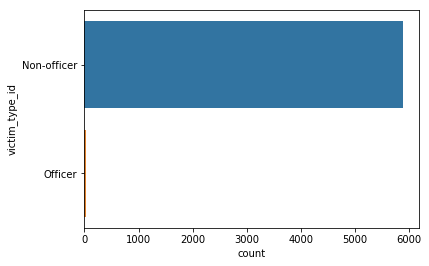

In [105]:
cleanedVictimDF = victimDF.drop(labels=["outside_agency_id",  "agency_data_year", "ff_line_number"], axis=1)
officerDF = cleanedVictimDF[cleanedVictimDF["victim_type_id"] == 5]
nonOfficerDF = cleanedVictimDF[cleanedVictimDF["victim_type_id"] != 5]
count = cleanedVictimDF["victim_type_id"] == 5

# plot out the count of non-officer and officer victims
count[count == False] = "Non-officer"
count[count == True]  = "Officer"
sns.countplot(y = count)

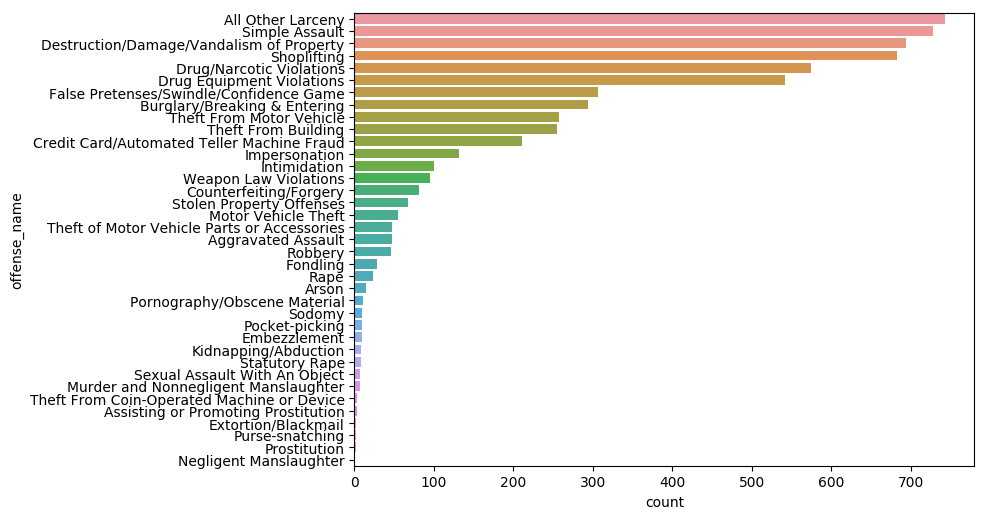

In [85]:
incidentOffenseDF = (incidentDF.merge(offenseDF, how="inner", on="incident_id")
                               .merge(offenseTypeDF, how="inner", on="offense_type_id"))
countPlot(incidentOffenseDF, "offense_name")


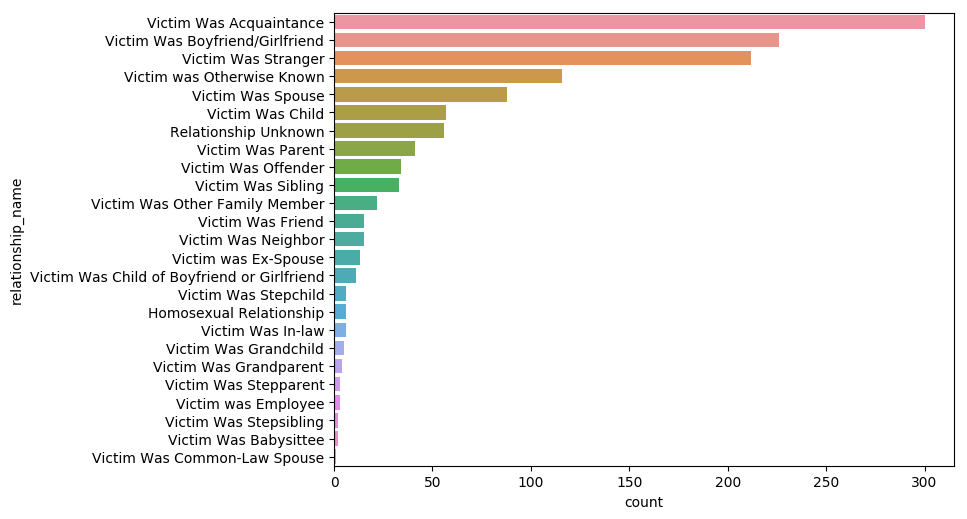

In [86]:
joinedRelationshipDF = relationshipDF.merge(victimOffenderRel, on="relationship_id", how="inner")
countPlot(joinedRelationshipDF, "relationship_name")